#### Handwritten digits classification using KNN

In [6]:
# Import data 
from sklearn.datasets import load_digits

ld = load_digits()
X = ld.data
Y = ld.target

### Check the data types
print(type(X),type(Y),"\n\n\n")

### Check the shape of the data
print("Shape of X is {}".format(X.shape))
print("Shape of Y is {}".format(Y.shape))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 



Shape of X is (1797, 64)
Shape of Y is (1797,)


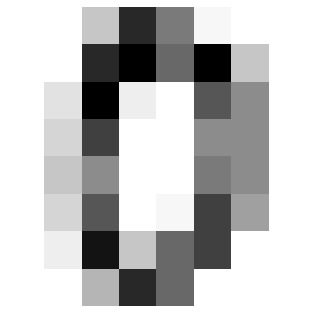

In [9]:
### Visulize the data
import matplotlib.pyplot as plt

img = X[0].reshape((8,8))
plt.style.use("seaborn") ## My fav
plt.imshow(img)
plt.axis("off")
plt.show()

In [15]:
## Modeling data
import numpy as np

class KNN:
    def __init__(self,X,Y):
        """Initialize the data"""
        self.X = X
        self.Y = Y
    def distance(self,x1,x2):
        """Return the distance between all the features of two data"""
        return (np.sum((x1-x2)**2))
    def predict(self,query_point,k):
        """Return the prediction"""
        X = self.X
        Y = self.Y
        m = X.shape[0]
        vals = []
        for i in range(m):
            d = self.distance(X[i],query_point)
            vals.append((d,Y[i]))
        vals = sorted(vals)
        vals = vals[:k]
        vals = np.array(vals)
        counts = np.unique(vals[:,1],return_counts=True)
        return counts[0][counts[1].argmax()]

In [22]:
kn = KNN(X,Y)
print("Prediction from the algorithm {}".format(kn.predict(X[1],6))) ##Prediction from the algo
print("Actual prediction {}".format(Y[1]))

Prediction from the algorithm 1.0
Actual prediction 1


In [46]:
## Training on the Dibetes detection challenge
## Extracting data
import pandas as pds
XDF = pds.read_csv('Diabetes_XTrain.csv')
YDF = pds.read_csv('Diabetes_YTrain.csv')

## Stastical data analysis data 
print(XDF.describe(),"\n\n\n")

## Extracting values
uncleanedX = XDF.values
Y = YDF.values

print(uncleanedX.shape,Y.shape)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   576.000000  576.000000     576.000000     576.000000  576.000000   
mean      3.758681  119.975694      68.826389      20.364583   76.166667   
std       3.328783   31.512914      20.285812      15.893856  109.193550   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  116.000000      72.000000      22.000000   36.000000   
75%       6.000000  139.000000      80.000000      32.000000  120.000000   
max      17.000000  199.000000     122.000000      63.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  576.000000                576.000000  576.000000  
mean    31.857292                  0.481519   32.954861  
std      8.134926                  0.336910   11.878137  
min      0.000000                  0.078000   21.000000  
25%     26.975000        

In [29]:
## Standardisation
changedX = (uncleanedX - uncleanedX.mean())/uncleanedX.std()

print(changedX.mean(),changedX.std())

-2.4671622769447922e-17 1.0


In [38]:
kn = KNN(changedX,Y)
print("Prediction from the algorithm {}".format(kn.predict(changedX[10],6))) ##Prediction from the algo
print("Actual prediction {}".format(Y[10]))

Prediction from the algorithm [0]
Actual prediction [0]


In [41]:
## Accuracy
yPred = []
for i in range(changedX.shape[0]):
    yPred.append(kn.predict(changedX[10],6))
print("The accuracy from the model is {}".format((yPred==Y).sum()/len(yPred)))

The accuracy from the model is 0.6510416666666666


In [47]:
## Prediction on the test data from challenge
XtestDF = pds.read_csv('Diabetes_Xtest(1).csv')
print(XtestDF.describe(),"\n\n\n")

uncleanedTestX = XtestDF.values

XTest = (uncleanedTestX - uncleanedTestX.mean())/uncleanedTestX.std()
print(XTest.mean(),XTest.std())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   192.000000  192.000000     192.000000     192.000000  192.000000   
mean      4.104167  123.651042      69.942708      21.052083   90.697917   
std       3.485134   33.245684      16.269068      16.156868  131.451830   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000  101.500000      64.000000       0.000000    0.000000   
50%       3.000000  120.000000      72.000000      25.500000    9.000000   
75%       6.250000  145.250000      78.500000      32.000000  140.500000   
max      15.000000  198.000000     108.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  192.000000                192.000000  192.000000  
mean    32.398438                  0.442948   34.098958  
std      7.083182                  0.313054   11.386388  
min      0.000000                  0.085000   21.000000  
25%     28.175000        

In [55]:
yPred = []
for i in range(XTest.shape[0]):
    yPred.append(kn.predict(XTest[i],5))
df = pds.DataFrame(yPred)
df.to_csv('Y_Test.csv',index=False)